In [4]:
taxi_train = "data/tax-fare/taxi-fare-train.csv"
taxi_test = "data/tax-fare/taxi-fare-test.csv"

In [5]:

from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import math   # yep! going to a bit of maths later!!
# from scipy import stats as st # and some stats

## Data load and exploration

In [6]:

tax_train = pd.read_csv(taxi_train)
tax_train.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.8,CRD,17.5
1,CMT,1,1,474,1.5,CRD,8.0
2,CMT,1,1,637,1.4,CRD,8.5
3,CMT,1,1,181,0.6,CSH,4.5
4,CMT,1,1,661,1.1,CRD,8.5


In [7]:
tax_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
vendor_id            1048575 non-null object
rate_code            1048575 non-null int64
passenger_count      1048575 non-null int64
trip_time_in_secs    1048575 non-null int64
trip_distance        1048575 non-null float64
payment_type         1048575 non-null object
fare_amount          1048575 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 56.0+ MB


In [8]:
tax_train = tax_train[tax_train.passenger_count==1]
tax_train.passenger_count.unique()

array([1])

In [9]:

tax_test = pd.read_csv(taxi_test)
tax_test.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,VTS,1,1,1140,3.75,CRD,15.5
1,VTS,1,1,480,2.72,CRD,10.0
2,VTS,1,1,1680,7.80,CSH,26.5
3,VTS,1,1,600,4.73,CSH,14.5
4,VTS,1,1,600,2.18,CRD,9.5


In [9]:


X = tax_train['trip_distance']
y = tax_train['fare_amount']

## Steps :

1. Load data
2. Clean data
3. Train model with training dataset
4. Have a look at the statistics
5. Test the trained model with provided test dataset

## Data details

These data sets are originally from the http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml.

The label is the identifier of the column you are trying to predict. The identified features are used to predict the label.

vendor_id: The ID of the taxi vendor is a feature.

rate_code: The rate type of the taxi trip is a feature.

passenger_count: The number of passengers on the trip is a feature.

trip_time_in_secs: The amount of time the trip took. You won't know how long the trip takes until after it is 

completed. You exclude this column from the model.

trip_distance: The distance of the trip is a feature.

payment_type: The payment method (cash or credit card) is a feature.

fare_amount: The total taxi fare paid is the label.


In [10]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math   # yep! going to a bit of maths later!!
from scipy import stats as st # and some stats

## Problem Statement : 
Predict the price of a car given its compression ratio

In [11]:
X.describe()

count    1.048575e+06
mean     2.777991e+00
std      3.301277e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.700000e+00
75%      3.090000e+00
max      9.870000e+01
Name: trip_distance, dtype: float64

In [12]:
y.describe()

count    1.048575e+06
mean     1.166208e+01
std      9.594169e+00
min      2.500000e+00
25%      6.500000e+00
50%      9.000000e+00
75%      1.300000e+01
max      4.250000e+02
Name: fare_amount, dtype: float64

In [13]:
print ("Std Dev of X Training set: ", np.std(X), "\n")
print ("Std Dev of Y Training set: ", np.std(y), "\n")

('Std Dev of X Training set: ', 3.3012758458793128, '\n')
('Std Dev of Y Training set: ', 9.594164338506618, '\n')


## Data Split between train and test

In [14]:
from sklearn.model_selection import train_test_split

x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y)

# Review some of the statistics to check whether the data is skewed
print ("Mean of X Training set: ", np.mean(x_training_set), "\n")
print ("Median of X Training set: ", np.median(x_training_set), "\n")
print ("Mean of Y Training set: ", np.mean(y_training_set), "\n")
print ("Median of Y Training set: ", np.median(y_training_set), "\n")
print ("Std Dev of X Training set: ", np.std(x_training_set), "\n")
print ("Std Dev of Y Training set: ", np.std(y_training_set), "\n")

('Mean of X Training set: ', 2.77516767523152, '\n')
('Median of X Training set: ', 1.7, '\n')
('Mean of Y Training set: ', 11.656076311844265, '\n')
('Median of Y Training set: ', 9.0, '\n')
('Std Dev of X Training set: ', 3.2954483548868456, '\n')
('Std Dev of Y Training set: ', 9.573915664349041, '\n')


In [15]:

x_training_set, x_test_set, y_training_set, y_test_set = x_training_set.values, x_test_set.values, y_training_set.values, y_test_set.values
x_training_set, x_test_set, y_training_set, y_test_set = x_training_set.reshape(-1, 1), x_test_set.reshape(-1, 1), y_training_set.reshape(-1, 1), y_test_set.reshape(-1, 1)

## Exploration

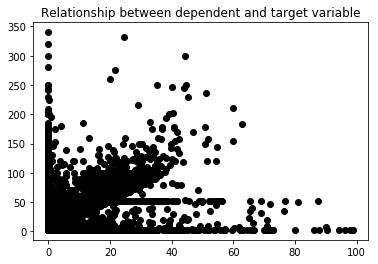

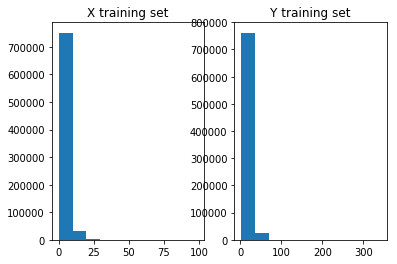

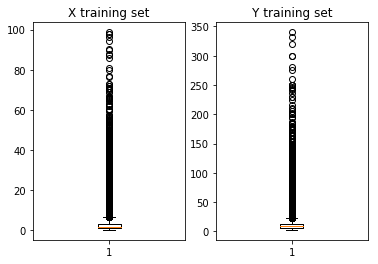

In [16]:
# So let's plot some of the data 
# - this gives some core routines to experiment with different parameters
plt.title('Relationship between dependent and target variable')
plt.scatter(x_training_set, y_training_set,  color='black')
plt.show()

# Use subplot to have graphs side by side
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(y_training_set)
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(y_training_set)
plt.show()

## Fitting

In [18]:
lm = linear_model.LinearRegression()
# ... then fir it
lm.fit(x_training_set,y_training_set)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Statistics or Interpretation

In [20]:


# and so the correlation is..
print('Correlation: ', math.sqrt(model_score))

# This the coefficient for the single feature
print("Coefficient for X ", lm.coef_)

# Get the standard error
print ("Standard Error: ",st.sem(x_training_set))
# Our null hypothesis for this is that there is no difference between the coefficient and the true value
# that the coefficient should be
ttest = lm.coef_/st.sem(x_training_set)
print ("The t-statistic:",ttest)

# but we need the p-value to help determine the probablity that we have a correct t-statistic
print ("Two tailed p-values: ",st.pearsonr(x_training_set, y_training_set))

# F-statistic  shows whether there is a relationship between the response and the predictors

# First get the total sum of the squares.
TSS = y_training_set
TSS = [i**2 for i in TSS]   # Using list comprehension to square each element
TSS = np.sum(TSS)

# This calculates the residual sum of the squares
y_predicted = lm.predict(x_training_set)   # These are predicted values of Y
y_variance = y_training_set - y_predicted # These are the residuals bewteen actual values of Y and the predcitions
y_variance = [i**2 for i in y_variance]   # Using list comprehension to square each element
RSS = np.sum(y_variance)

# f-statistic formula for single variable = ((TSS -RSS)/p)/(RSS/(n - p -1)) becomes
#(TSS - RSS)/(RSS/ (n - 2) )
Fstatistic = (TSS - RSS) / (RSS/(np.size(y_predicted) - 2))
print ("The F-statistic is:  ", Fstatistic)

('R sq: ', 0.7729861480277364)
('Correlation: ', 0.8791963080153011)
('Coefficient for X ', array([[2.55423554]]))
('Standard Error: ', array([0.00371608]))
('The t-statistic:', array([[687.34767736]]))
('Two tailed p-values: ', (array([0.87919631]), array([0.])))
('The F-statistic is:  ', 7812713.300279605)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score


model_score = lm.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R sq: ',model_score)

y_predicted = lm.predict(x_test_set)

# The coefficients
print('Coefficients: ', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_set, y_predicted))


('R sq: ', 0.7729861480277364)
('Coefficients: ', array([[2.55423554]]))
Mean squared error: 21.33
Variance score: 0.77


## Validation

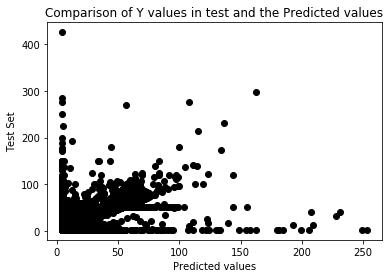

In [27]:
# So let's run the model against the test data
y_predicted = lm.predict(x_test_set)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_predicted, y_test_set,  color='black')
plt.show()

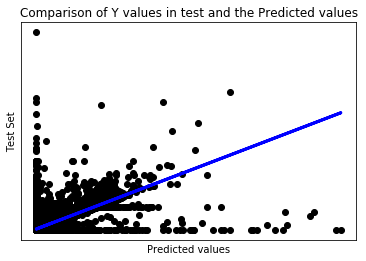

In [29]:
# Plot outputs
y_predicted = lm.predict(x_test_set)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(x_test_set, y_test_set,  color='black')
plt.plot(x_test_set, y_predicted, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()